<a href="https://colab.research.google.com/github/udita2404/Migration-Prediction/blob/main/Migration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-18-3754637802.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Measure'].replace({"Arrivals": 0, "Departures": 1, "Net": 2}, inplace=True)
/tmp/ipython-input-18-3754637802.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Measure'].replace({"Arrivals": 0, "Depar

Model R² Score: 0.7450398783003447


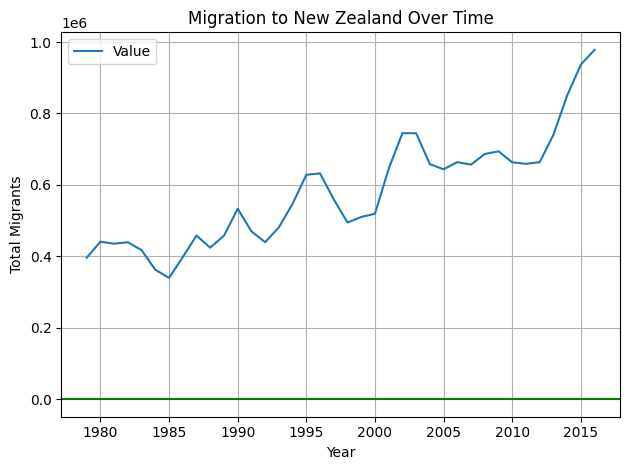

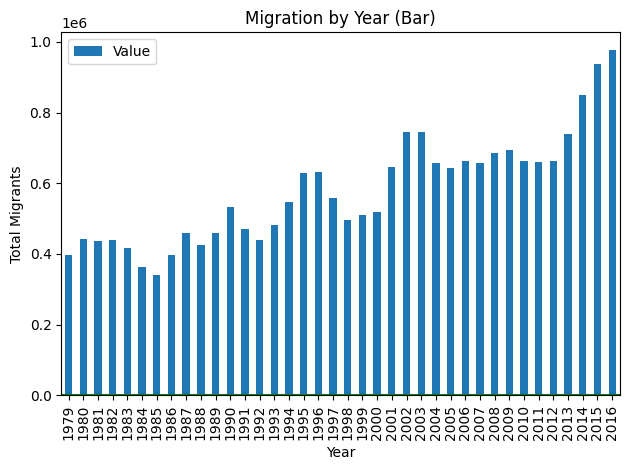

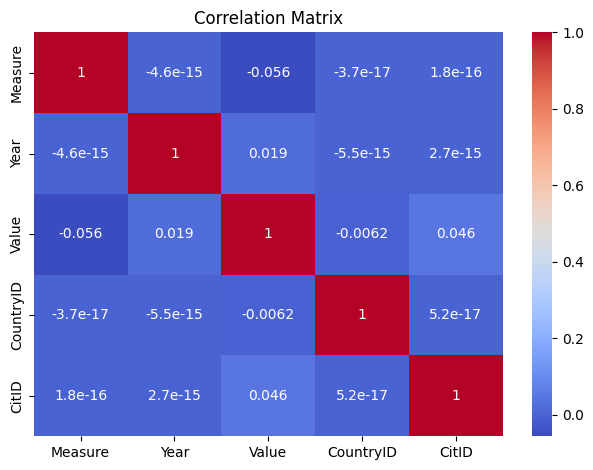

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

# Load dataset
data = pd.read_csv('migration_nz.csv')

# Convert categorical columns to numeric values
data['Measure'].replace({"Arrivals": 0, "Departures": 1, "Net": 2}, inplace=True)
data['CountryID'] = pd.factorize(data['Country'])[0]
data['CitID'] = pd.factorize(data['Citizenship'])[0]

# Fill missing values
data["Value"].fillna(data["Value"].median(), inplace=True)

# Drop non-numeric columns
data.drop(['Country', 'Citizenship'], axis=1, inplace=True)

# Features and Target
X = data[['CountryID', 'Measure', 'Year', 'CitID']].to_numpy()
Y = data['Value'].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=70, max_features=3, max_depth=5, n_jobs=-1)
rf.fit(X_train, y_train)

# Print R² score
print("Model R² Score:", rf.score(X_test, y_test))

# Line plot of migration trend by year
grouped = data.groupby('Year').agg({'Value': 'sum'})
grouped.plot(kind='line')
plt.axhline(0, color='g')
plt.title("Migration to New Zealand Over Time")
plt.ylabel("Total Migrants")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot
grouped.plot(kind='bar')
plt.axhline(0, color='g')
plt.title("Migration by Year (Bar)")
plt.ylabel("Total Migrants")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
